In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions


In [3]:
x,y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

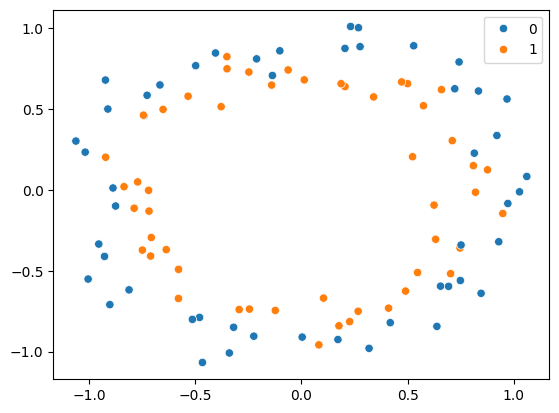

In [9]:
sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = y)

In [11]:
model  = Sequential()

In [12]:
model.add(Dense(256, input_dim = 2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\myenv39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=2000, verbose= 0, validation_data = (x_test, y_test))

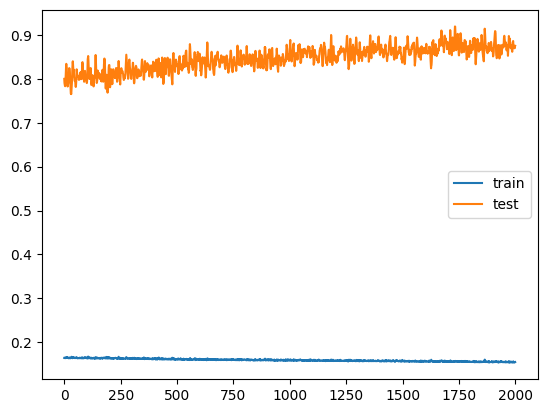

In [23]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label = 'train')
ax.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 780us/step


<Axes: >

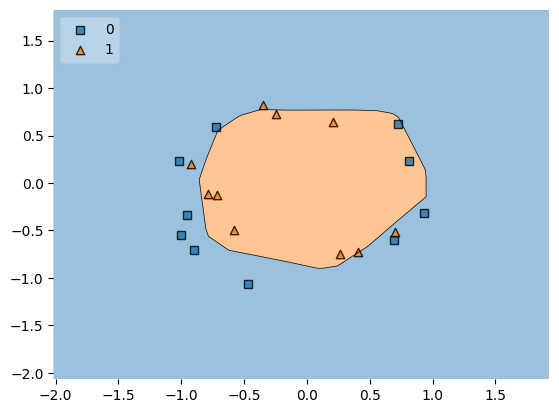

In [26]:
plot_decision_regions(x_test, y_test.ravel(), clf=model, legend=2)

In [27]:
model.add(Dense(256, input_dim = 2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


c:\Users\Subham Pathak\Desktop\AI\DEEP_LEARNING\myenv39\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta= 0.0001,
    patience = 20,
    verbose = 1,
    mode='auto',
    baseline=None,
    restore_best_weights=False   
    
)

In [ ]:
history = model.fit(x_train, y_train, epochs=2000, validation_data=(x_test, y_test), callbacks=callback)

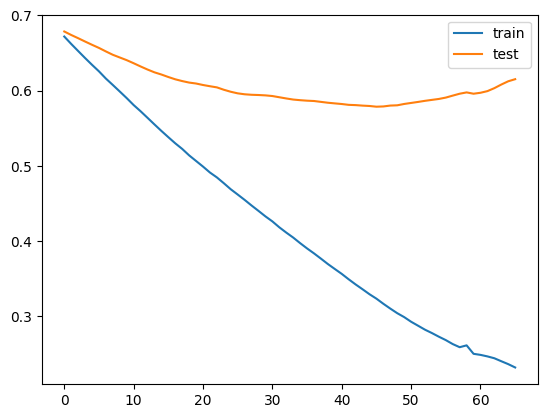

In [34]:
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label = 'train')
ax.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()